<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/04_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Feature Engineering</h1>

## Overview

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section we will </p>
    <ol>
        <li>Import Categorical Data</li>
        <li>Perform Feature Engineering (on required categories)</li>
        <li>Apply Feature Engineering</li>
        <li>Save Modified Data</li>
    </ol>
</div>

### Standard Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Disable pretty
%pprint
%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set() 

Pretty printing has been turned OFF


In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Import Categorical Data

In [4]:
CATEGORICAL_FEATURES = ['gender', 'nationality','place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 
                        'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 
                        'student_absence_days','class']

In [5]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
categorical_df = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv', usecols = CATEGORICAL_FEATURES)

In [6]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_cleaned.csv'
categorical_df = pd.read_csv(url, usecols = CATEGORICAL_FEATURES )

In [7]:
# Cheack the data is properly loaded
categorical_df.head()

,gender,nationality,place_of_birth,stage_id,grade_id,section_id,topic,semester,relation,parent_answering_survey,parent_school_satisfaction,student_absence_days,class
0,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [8]:
# Convert Data Type to Categories for efficent memory utilization
for feature in categorical_df.columns:
    categorical_df[feature] = categorical_df[feature].astype('category')
categorical_df.dtypes

gender                        category
nationality                   category
place_of_birth                category
stage_id                      category
grade_id                      category
section_id                    category
topic                         category
semester                      category
relation                      category
parent_answering_survey       category
parent_school_satisfaction    category
student_absence_days          category
class                         category
dtype: object

In [9]:
NOMINAL_FEATURES = ['nationality','place_of_birth', 'section_id', 'topic']
ORDINAL_FEATURES = ['stage_id', 'grade_id']

In [10]:
nominal_df = categorical_df[NOMINAL_FEATURES]
ordinal_df = categorical_df[ORDINAL_FEATURES]

### 2. Perform Feature Engineering

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size:120%">
As a result of visual anaylsis of categorical data it was obvious that <strong>'nationality'</strong>, <strong>'place_of_birth'</strong> and <strong>topic</strong> require feature engineering to reduce the high cardinalty and rare lables.
</div>

#### 2.1 Nominal 

#### nationality and place_of_birth

In [11]:
nationality_df = pd.DataFrame(nominal_df['nationality'].value_counts()).reset_index()
place_of_birth_df = pd.DataFrame(nominal_df['place_of_birth'].value_counts()).reset_index()

In [12]:
# Comparing the nationality and place of birth together
geographical_df = nationality_df.merge(place_of_birth_df, how='left', on='index')
geographical_df.columns = ['index','nationality', 'place_of_birth']
geographical_df['nationality %'] = (geographical_df['nationality']/geographical_df['nationality'].sum())*100
geographical_df['place_of_birth %'] = (geographical_df['place_of_birth']/geographical_df['place_of_birth'].sum())*100
geographical_df

,index,nationality,place_of_birth,nationality %,place_of_birth %
0,Kuwait,179,180,37.447699,37.656904
1,Jordan,170,174,35.564854,36.401674
2,Palestine,28,10,5.857741,2.092050
3,Iraq,22,22,4.602510,4.602510
4,Lebanon,17,19,3.556485,3.974895
5,Tunis,12,9,2.510460,1.882845
6,SaudiArabia,11,16,2.301255,3.347280
7,Egypt,9,9,1.882845,1.882845
8,Syria,7,6,1.464435,1.255230
9,Iran,6,6,1.255230,1.255230


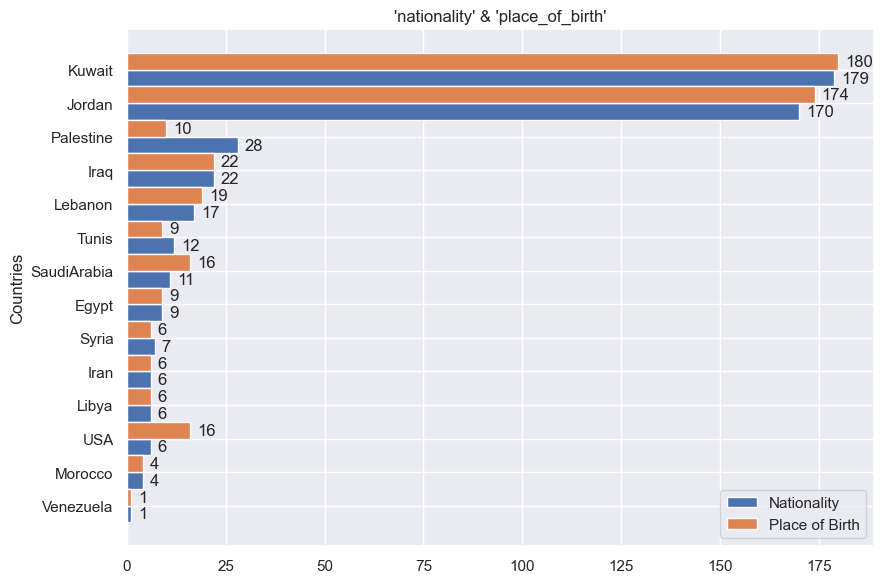

In [13]:
labels = list(geographical_df['index'])[::-1]
counts_nationality= list(geographical_df['nationality'])[::-1]
counts_place_of_birth=list(geographical_df['place_of_birth'])[::-1]

y = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 6))
rects1 = ax.barh(y - width/2, counts_nationality, width, label='Nationality')
rects2 = ax.barh(y + width/2, counts_place_of_birth, width, label='Place of Birth')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Countries')
ax.set_title("'nationality' & 'place_of_birth'")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)

fig.tight_layout()

plt.show()

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size: 120%">
Visualizing <strong>'nationality'</strong> and <strong>'placeof_birth'</strong> side by side shows similarties in the two features.
</div>

In [14]:
geographical_df

,index,nationality,place_of_birth,nationality %,place_of_birth %
0,Kuwait,179,180,37.447699,37.656904
1,Jordan,170,174,35.564854,36.401674
2,Palestine,28,10,5.857741,2.092050
3,Iraq,22,22,4.602510,4.602510
4,Lebanon,17,19,3.556485,3.974895
5,Tunis,12,9,2.510460,1.882845
6,SaudiArabia,11,16,2.301255,3.347280
7,Egypt,9,9,1.882845,1.882845
8,Syria,7,6,1.464435,1.255230
9,Iran,6,6,1.255230,1.255230


<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size: 120%">
Combining <strong>'nationality'</strong> and <strong>'placeof_birth'</strong> together in a dataframe we can calculate the percentage of each label in the categories.
</div>

In [15]:
country_map = { 'Kuwait':'Kuwait', 'Lebanon':'Others', 'Egypt' : 'Others', 'SaudiArabia':'Others', 'USA':'Others',
    'Jordan':'Jordan', 'Venezuela':'Others', 'Iran':'Others', 'Tunis':'Others', 'Morocco':'Others', 'Syria':'Others',
    'Palestine':'Others', 'Iraq':'Others', 'Libya':'Others' }

geographical_df['labels']= geographical_df['index'].map(country_map)
geographical_df[['index', 'labels']]

,index,labels
0,Kuwait,Kuwait
1,Jordan,Jordan
2,Palestine,Others
3,Iraq,Others
4,Lebanon,Others
5,Tunis,Others
6,SaudiArabia,Others
7,Egypt,Others
8,Syria,Others
9,Iran,Others


In [16]:
nominal_df['modified_nationality']= nominal_df['nationality'].map(country_map)
nominal_df['modified_place_of_birth']= nominal_df['place_of_birth'].map(country_map)

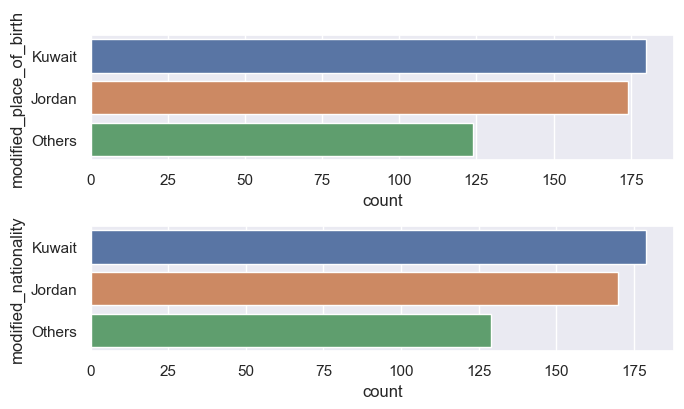

In [17]:
plt.rcParams["figure.figsize"] = [7.00, 4.00]

fig, axs = plt.subplots(2)

sns.countplot(ax=axs[0], y='modified_place_of_birth', data=nominal_df, order=['Kuwait','Jordan','Others'])
sns.countplot(ax=axs[1], y='modified_nationality', data=nominal_df,order=['Kuwait','Jordan','Others']);

#sns.countplot(y='eng_place_of_birth', data=nominal_df);

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size: 120%">
Grouping the low percentage labels together creates a balance, as evident from the histogram above.
</div>

#### topic

In [18]:
topic_df = pd.DataFrame(nominal_df['topic'].value_counts()).reset_index()
topic_df['%'] = (topic_df['topic']/topic_df['topic'].sum())*100
topic_df

,index,topic,%
0,IT,95,19.874477
1,French,63,13.179916
2,Arabic,59,12.343096
3,Science,51,10.669456
4,English,45,9.414226
5,Biology,30,6.276151
6,Spanish,25,5.230126
7,Chemistry,24,5.020921
8,Geology,24,5.020921
9,Quran,22,4.602510


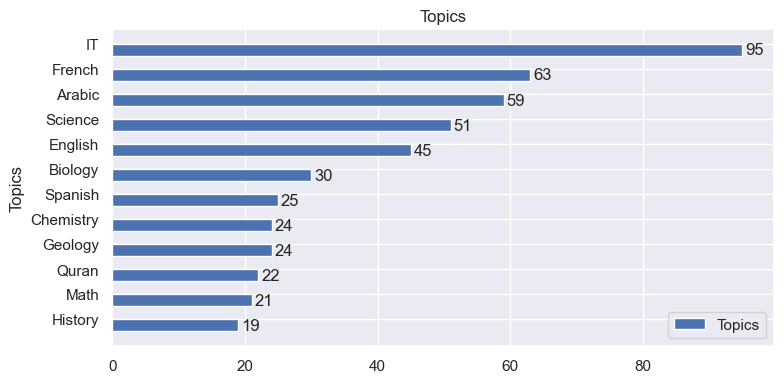

In [19]:
labels = list(topic_df['index'])[::-1]
counts_topic= list(topic_df['topic'])[::-1]

y = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.barh(y - width/2, counts_topic, width, label='Topics')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Topics')
ax.set_title("Topics")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects1, padding=2)

fig.tight_layout()

plt.show()

In [20]:
topics_map = { 'IT':'IT', 'French':'Language', 'Arabic':'Language', 'Spanish':'Language', 'English':'Language',
    'Science':'Sciences', 'Biology':'Sciences', 'Chemistry':'Sciences', 'Geology':'Sciences', 'Math':'Sciences',
    'Quran':'Humanities', 'History':'Humanities' }

topic_df['labels']= topic_df['index'].map(topics_map)
topic_df

,index,topic,%,labels
0,IT,95,19.874477,IT
1,French,63,13.179916,Language
2,Arabic,59,12.343096,Language
3,Science,51,10.669456,Sciences
4,English,45,9.414226,Language
5,Biology,30,6.276151,Sciences
6,Spanish,25,5.230126,Language
7,Chemistry,24,5.020921,Sciences
8,Geology,24,5.020921,Sciences
9,Quran,22,4.602510,Humanities


In [21]:
nominal_df['modified_topic']= nominal_df['topic'].map(topics_map)

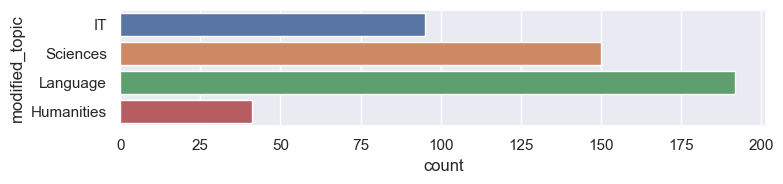

In [22]:
plt.rcParams["figure.figsize"] = [8.00, 2.00]
fig, axs = plt.subplots()
sns.countplot( y='modified_topic', data=nominal_df);

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size: 120%">
In the <strong>'topic'</strong> we logically combined the topics togather to eleminate the presence of rear labels.
</div>

#### 2.2 Ordinal 

#### grade_id

In [23]:
grade_id_df = pd.DataFrame(categorical_df['grade_id'].value_counts()).reset_index()
grade_id_df

,index,grade_id
0,G-02,145
1,G-08,116
2,G-07,101
3,G-04,48
4,G-06,32
5,G-11,13
6,G-12,11
7,G-09,5
8,G-10,4
9,G-05,3


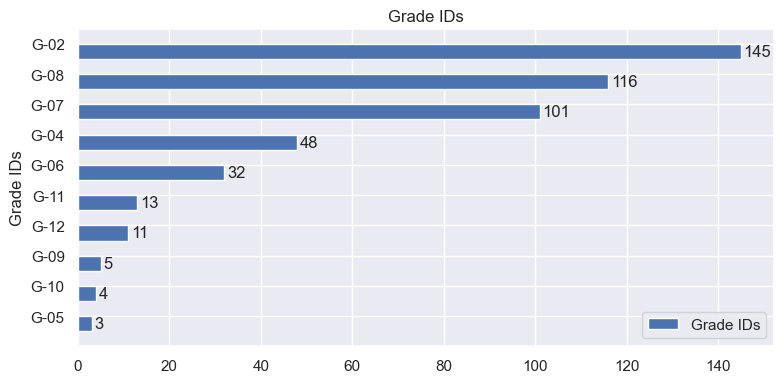

In [24]:
labels = list(grade_id_df['index'])[::-1]
counts_topic= list(grade_id_df['grade_id'])[::-1]

y = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.barh(y - width/2, counts_topic, width, label='Grade IDs')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Grade IDs')
ax.set_title("Grade IDs")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects1, padding=2)

fig.tight_layout()

plt.show()

In [25]:
grade_map = { 'G-02':'Lower', 'G-04':'Lower', 'G-05':'Lower', 'G-06':'Lower',
    'G-07':'Higher', 'G-08':'Higher', 'G-09':'Higher', 'G-10':'Higher', 'G-11':'Higher', 'G-12':'Higher' }

grade_id_df['grade_labels']= grade_id_df['index'].map(grade_map)
grade_id_df

,index,grade_id,grade_labels
0,G-02,145,Lower
1,G-08,116,Higher
2,G-07,101,Higher
3,G-04,48,Lower
4,G-06,32,Lower
5,G-11,13,Higher
6,G-12,11,Higher
7,G-09,5,Higher
8,G-10,4,Higher
9,G-05,3,Lower


In [26]:
ordinal_df['modified_grade_id']= ordinal_df['grade_id'].map(grade_map)
ordinal_df.head()

,stage_id,grade_id,modified_grade_id
0,LowerLevel,G-04,Lower
1,LowerLevel,G-04,Lower
2,LowerLevel,G-04,Lower
3,LowerLevel,G-04,Lower
4,LowerLevel,G-04,Lower


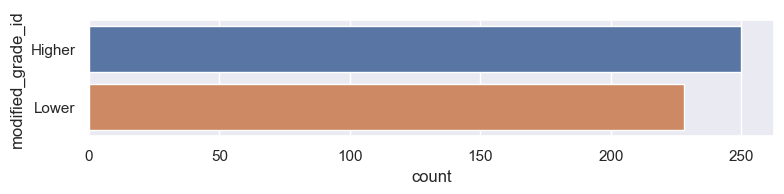

In [27]:
plt.rcParams["figure.figsize"] = [8.00, 2.00]

fig, axs = plt.subplots()

sns.countplot(y='modified_grade_id', data=ordinal_df, order=['Higher','Lower']);


<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size: 120%">
<strong>'grade_id'</strong> falls under the ordinal category. In order to simplify, grades are gouped as Lower (1-6) and Higher (7-12) gardes. Now it is a binary category.
</div>

### 3. Apply Feature Engineering

In [28]:
modified_df = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv')

In [29]:
modified_df["nationality"].replace(country_map, inplace=True)

In [30]:
modified_df["place_of_birth"].replace(country_map, inplace=True)

In [31]:
modified_df["topic"].replace(topics_map, inplace=True)

In [32]:
modified_df["grade_id"].replace(grade_map, inplace=True)

### 4. Save Modified Data

In [33]:
# The cell will run on local stograge only.
modified_df.to_csv('./data/xAPI-Edu-Data_modified.csv',index=False)

## Observations

Carrying the work forward from the visualizing stage it is observed that:    

1. The Binary catregories don't need any further processing.   
2. In Nomial and Ordinal categories, Feature Engineering is required to reduce the number of rare labels, labels that are close to 5% in propotion. The features that can be Engineered are:    
    a. **'nationality'**    
    b. **'place_of_birth'**    
    c. **'topic'**    
    d. **grade_id**


## Conclusion

Based on the obervations:

1. **'nationality'** and **'place_of_birth'** labels are grouped as **Kuwait**, **Jordan** and **Others**.
2. **'topic'** labels are logically grouped as **IT**, **Languages**, **Sciences** and **Humanities** subject groups 
3. **'grade_id'** labesl are grouped as **Lower** and **Higher**, making this a binary feature.   
4. The feature enginnering changes were first observed and analyzed graphically and in tabular format.
5. Then the changes were implimented on the dataset.
6. The modified dataset is saved as _**xAPI-Edu-Data_modified.csv**_ file. 